<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_15_Matplotlib Scatter Plots.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/Users/haticekar/Desktop/anaconda/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Her bir meslek başlığı (job_title_short) için:

Ortalama yıllık maaşın medyanını bul: 
1. Kaç tane iş ilanı olduğunu bul
2. Bunları scatter plot (dağılım grafiği) olarak çiz.

Detaylı Açıklama:
* X eksenine: İş ilanı sayısı (job count)
* Y eksenine: Medyan yıllık maaş (median salary)

1. Her nokta bir iş unvanını (örneğin: Data Scientist, Backend Developer) temsil edecek.
2. Her noktanın üzerine de etiket olarak meslek adını (job_title_short) yazman isteniyor.

## 🟨 Median Yearly Salary vs. Job Count (2.15.1)

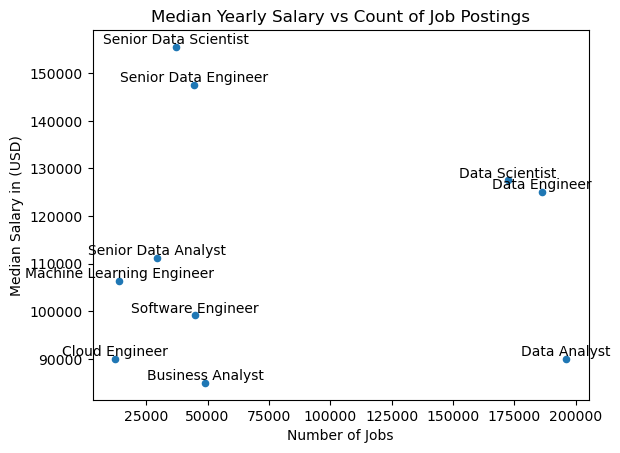

In [ ]:
job_title_stats = df.groupby("job_title_short").agg( #job_title sütununa göre grupladık
    median_salary = ("salary_year_avg", "median"), #gruplanan sütunun değerlerini bulmaya çalıştık 
    job_count = ("job_title_short", "count")
).dropna() # NaN verileri silmek için 

job_title_stats.plot(kind="scatter", x="job_count", y="median_salary")
plt.xlabel("Number of Jobs")
plt.ylabel("Median Salary in (USD)")
plt.title("Median Yearly Salary vs Count of Job Postings")

#Bu döngü "Her satır için job_count, median_salary, ve job_title bilgilerini alır."
# plt.text() ile ilgili noktanın üzerine iş unvanını yazar.
for i in range(len(job_title_stats)): #her noktanın üzerine etiket eklemek için yapıldı
   job_count = job_title_stats['job_count'].iloc[i]
   mean_salary = job_title_stats['median_salary'].iloc[i]
   job_title = job_title_stats.index[i]
   plt.text(job_count, mean_salary, job_title, ha='center', va='bottom') # ha = yazıyı yatayda ortala, va = yazıyı noktanın altına koy 

plt.show()

---

In [13]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


## 🟨 Top 7 Countries by Median Yearly Salary vs Job Count  (2.15.2)

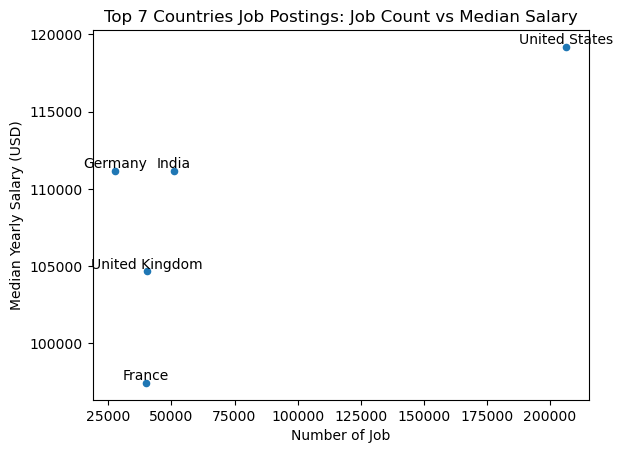

In [ ]:
country_stats = df.groupby("job_country").agg(
    median_salary = ("salary_year_avg", "median"),
    job_count = ("job_country", "count")
).dropna()

top_countries = country_stats.sort_values(by="job_count", ascending=False).head(7)

top_countries.plot(kind="scatter", x="job_count", y="median_salary")

plt.xlabel('Number of Job')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Top 7 Countries Job Postings: Job Count vs Median Salary')

for i in range(len(top_countries)):
    job_count = top_countries["job_count"].iloc[i]
    mean_salary = top_countries["median_salary"].iloc[i]
    country = top_countries.index[i]
    plt.text(job_count, mean_salary, country, ha="center", va="bottom")

plt.show()



---

## 🟥 Average Yearly Salary vs. Job Count for Top Roles by Schedule Type (2.15.3)

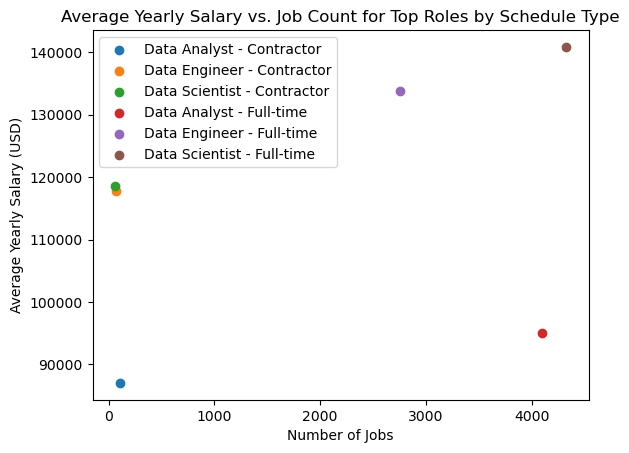

In [37]:
# Define specific job titles to include
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

# Filter US jobs for only full-time and part-time roles and specific job titles, then drop rows with missing salary data
us_jobs_df = df[
   (df['job_country'] == 'United States') &
   (df['job_schedule_type'].isin(['Full-time', 'Contractor'])) &
   (df['job_title_short'].isin(target_job_titles))
].dropna(subset=['salary_year_avg']).copy()

# Group by job schedule type and job title, calculate mean yearly salary and job count
stats = us_jobs_df.groupby(['job_schedule_type', 'job_title_short']).agg(
   mean_salary_year_avg=('salary_year_avg', 'mean'),
   job_count=('job_title_short', 'count')
).dropna()

# Reset the index to make plotting easier
stats.reset_index(inplace=True)

# Combine title and type into one value for labels
stats['job_title_type'] = stats['job_title_short'] + ' - ' + stats['job_schedule_type']

# Plot using plt.scatter()
for job_title_type in stats['job_title_type'].unique():
   subset = stats[stats['job_title_type'] == job_title_type]
   plt.scatter(subset['job_count'], subset['mean_salary_year_avg'], label=job_title_type)

plt.xlabel('Number of Jobs')
plt.ylabel('Average Yearly Salary (USD)')
plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type')
plt.legend()
plt.show()

---